## What is the most optimal skill to learn for Data Scientist & Data Analyst

### Procedure
1. Filter it to the dataframe to Data Scientist and United States  

2. Drop the NaN values in salary year avg and explode the skill
3. Create a new dataframe by using groupby with the job_skills and salary year avg with agg(count, median)
4. Add a new column called skill percent by dividing the skill count to the total count
5. Do the same (Step1~4) for Data Analyst by simply change the (job title short ==  Data Analyst)
6. Create scatter plots for both figure using matplotlib in one figure(by using subplots)
7. (Hard Step) Add the labels of the skill name and percentage next to each dot
8. Customization of the titles, axis, size, etc. 

In [ ]:
# Import the necessary libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


# Data Cleanup form a strings to list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Data Scientist (Dataframe)

In [ ]:
# Filter the dataframe 
df_DS_US = df[(df['job_title_short'] == 'Data Scientist')&(df['job_country'] == 'United States')].copy()
df_DS_US = df_DS_US.dropna(subset=['salary_year_avg'])
df_DS_US_exploded = df_DS_US.explode('job_skills')

# Create a new dataframe with its job skills and the salary year avg with the count and median
df_DS_skills = df_DS_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DS_skills = df_DS_skills.rename(columns={'count': 'skill_count', 'median':'median_salary'})

DS_job_count = len(df_DS_US)

# Add a skill percent column
df_DS_skills['skill_percent'] = df_DS_skills['skill_count'] /DS_job_count *100

skill_percent = 10

df_DS_skills_high = df_DS_skills[df_DS_skills['skill_percent'] > skill_percent]

df_DS_skills_high


,skill_count,median_salary,skill_percent
job_skills,,,
python,3358,131867.0,73.753569
sql,2463,134500.0,54.096200
r,2053,126000.0,45.091149
sas,1022,120000.0,22.446738
tableau,989,125000.0,21.721942
aws,768,134000.0,16.867999
spark,718,135959.5,15.769822
excel,490,124290.0,10.762135
tensorflow,474,149646.0,10.410718


### Data Analyst (Dataframe)

In [ ]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst')&(df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

# Rename the column name & Calculate the percentage
df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median':'median_salary'})
DA_job_count = len(df_DA_US)
df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] /DA_job_count *100

## Grab the job_skills that has skill_percent above 5
skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


## Plot of Data Scientist and Data Analyst

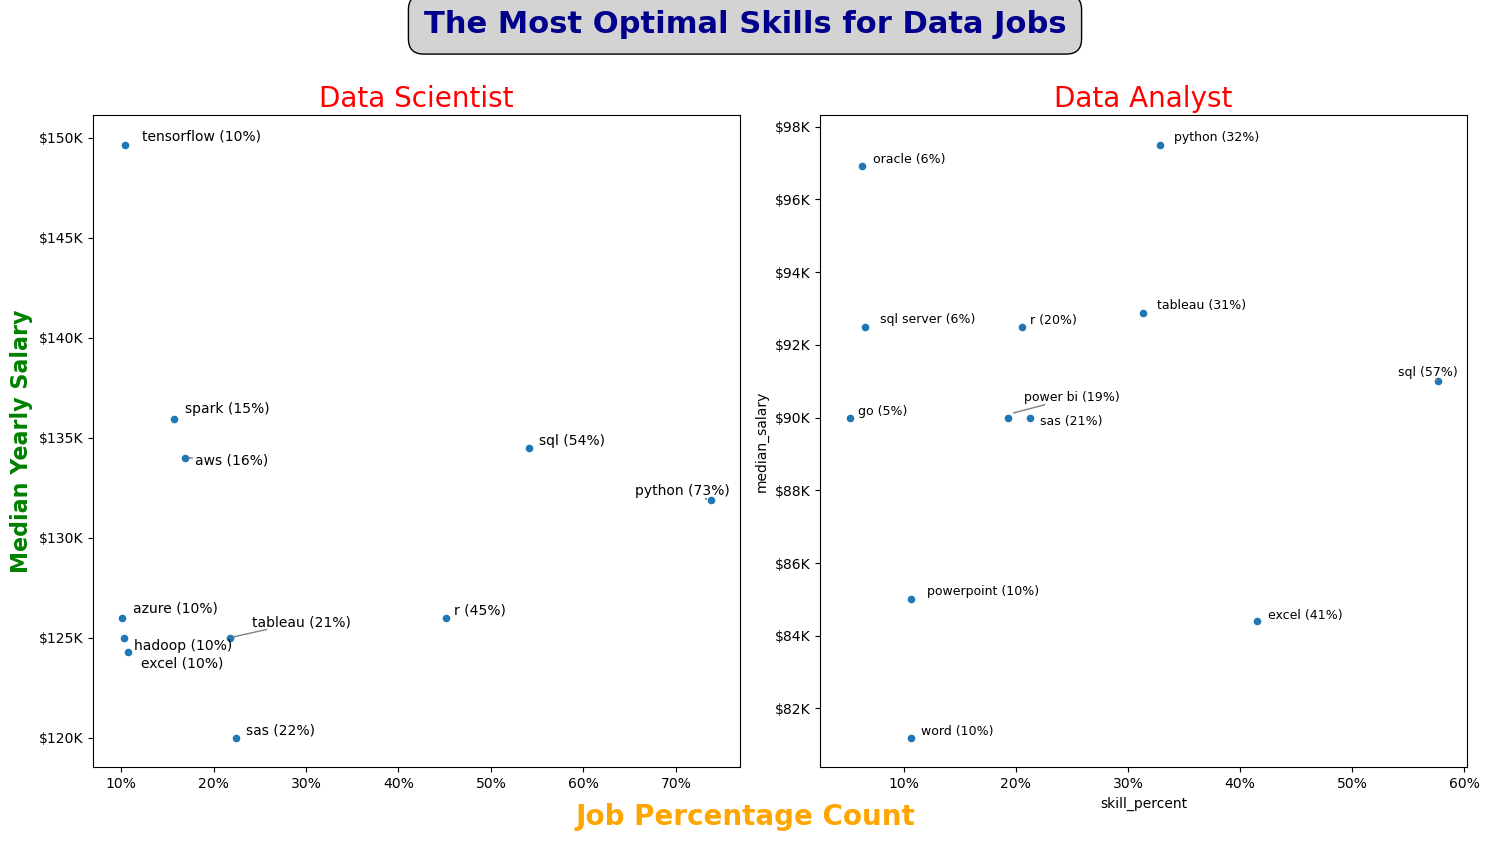

In [ ]:
from matplotlib.ticker import PercentFormatter
from adjustText import adjust_text

# Create a figure with 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# --- First subplot: Data Scientist skills ---

df_DS_skills_high.plot(kind='scatter', x='skill_percent', y='median_salary', ax=ax[0])

# Add text labels
texts1 = []
for i in range(len(df_DS_skills_high)):
    x = df_DS_skills_high['skill_percent'].iloc[i]
    y = df_DS_skills_high['median_salary'].iloc[i]
    skill = df_DS_skills_high.index[i]
    label = f"{skill} ({int(x)}%)"
    texts1.append(ax[0].text(x, y, label))

# Format axes
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax[0].xaxis.set_major_formatter(PercentFormatter(decimals=0))
ax[0].set_xlabel('')
ax[0].set_ylabel('Median Yearly Salary', color='green', fontsize=16, fontweight='bold')
ax[0].set_title('Data Scientist', color='red', fontsize=20)

# Adjust text arrow
adjust_text(texts1, ax=ax[0], arrowprops=dict(arrowstyle='->', color='gray'))


# --- Second subplot: Data Analyst skills ---

df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary', ax=ax[1])

# Add text labels
texts2 = []
for i in range(len(df_DA_skills_high_demand)):
    x = df_DA_skills_high_demand['skill_percent'].iloc[i]
    y = df_DA_skills_high_demand['median_salary'].iloc[i]
    skill = df_DA_skills_high_demand.index[i]
    label = f"{skill} ({int(x)}%)"
    if skill.lower() == "power bi":
        text = ax[1].text(x + 0.2, y + 100, label, fontsize=9)  # a bit adjustment on the power bi and sas overlapping
        texts2.append(text)
    else:
        text = ax[1].text(x, y, label, fontsize=9)
        texts2.append(text)

# Format axes
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax[1].xaxis.set_major_formatter(PercentFormatter(decimals=0))
ax[1].set_title('Data Analyst', color='red', fontsize=20)

# Adjust text arrow
adjust_text(texts2, ax=ax[1], arrowprops=dict(arrowstyle='->', color='gray'))

# Final title update
fig.suptitle(
    "The Most Optimal Skills for Data Jobs",
    fontsize=22,
    color='darkblue',
    weight='bold',
    bbox=dict(facecolor='lightgray', edgecolor='black', boxstyle='round,pad=0.5'),
    y=1.02
)
fig.text(
    0.5,                
    0.001,               
    "Job Percentage Count",
    ha='center',       
    fontsize=20,
    color='orange',
    weight='bold'
)
plt.tight_layout()
plt.show()

# <span style="color:red; font-weight:bold">Analysis</span>
### <span style="color:orange; font-weight:bold">🧪 Data Scientist Overview</span>
### High-Demand Skills:

- Python (73%) and SQL (54%) are the most in-demand, with median salaries of ~$133K and ~$134K respectively.

- R (45%) and Tableau (21%) are also fairly common.

### High-Paying Skills:

- TensorFlow ($150K) stands out with the highest median salary, although it appears in only 10% of jobs.

- Spark ($136K) and AWS ($134K) also offer high salaries and moderate demand (15-16%).

### Observations:

- A trade-off between demand and salary. More niche, specialized skills like TensorFlow and Spark are less frequently required but pay more.

- Widely used skills like Python and SQL provide a balance of good pay and high demand.

### <span style="color:orange; font-weight:bold">📊 Data Analyst Overview</span>
### High-Demand Skills:

- SQL (57%) and Excel (41%) dominate in job requirements.

- Python (32%), Tableau (31%), and R (20%) are also fairly popular.

### High-Paying Skills:

- Python ($98K) and Oracle ($97K) are the top-paying, though Oracle is only in 6% of jobs.

- Tableau ($93K) and SQL Server ($93K) also offer competitive salaries.

### Observations:

- Analysts earn less overall than scientists (~$90K range vs. ~$130K+).

- While Excel is widely used, it correlates with lower salaries (~$85K).

- Python stands out for both demand and salary potential.